In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


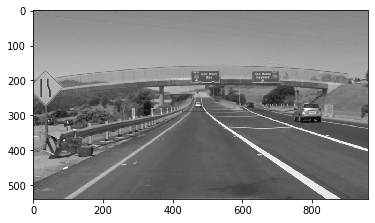

In [8]:
image = mpimg.imread('img/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

In [4]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

In [83]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 100
high_threshold = 180
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

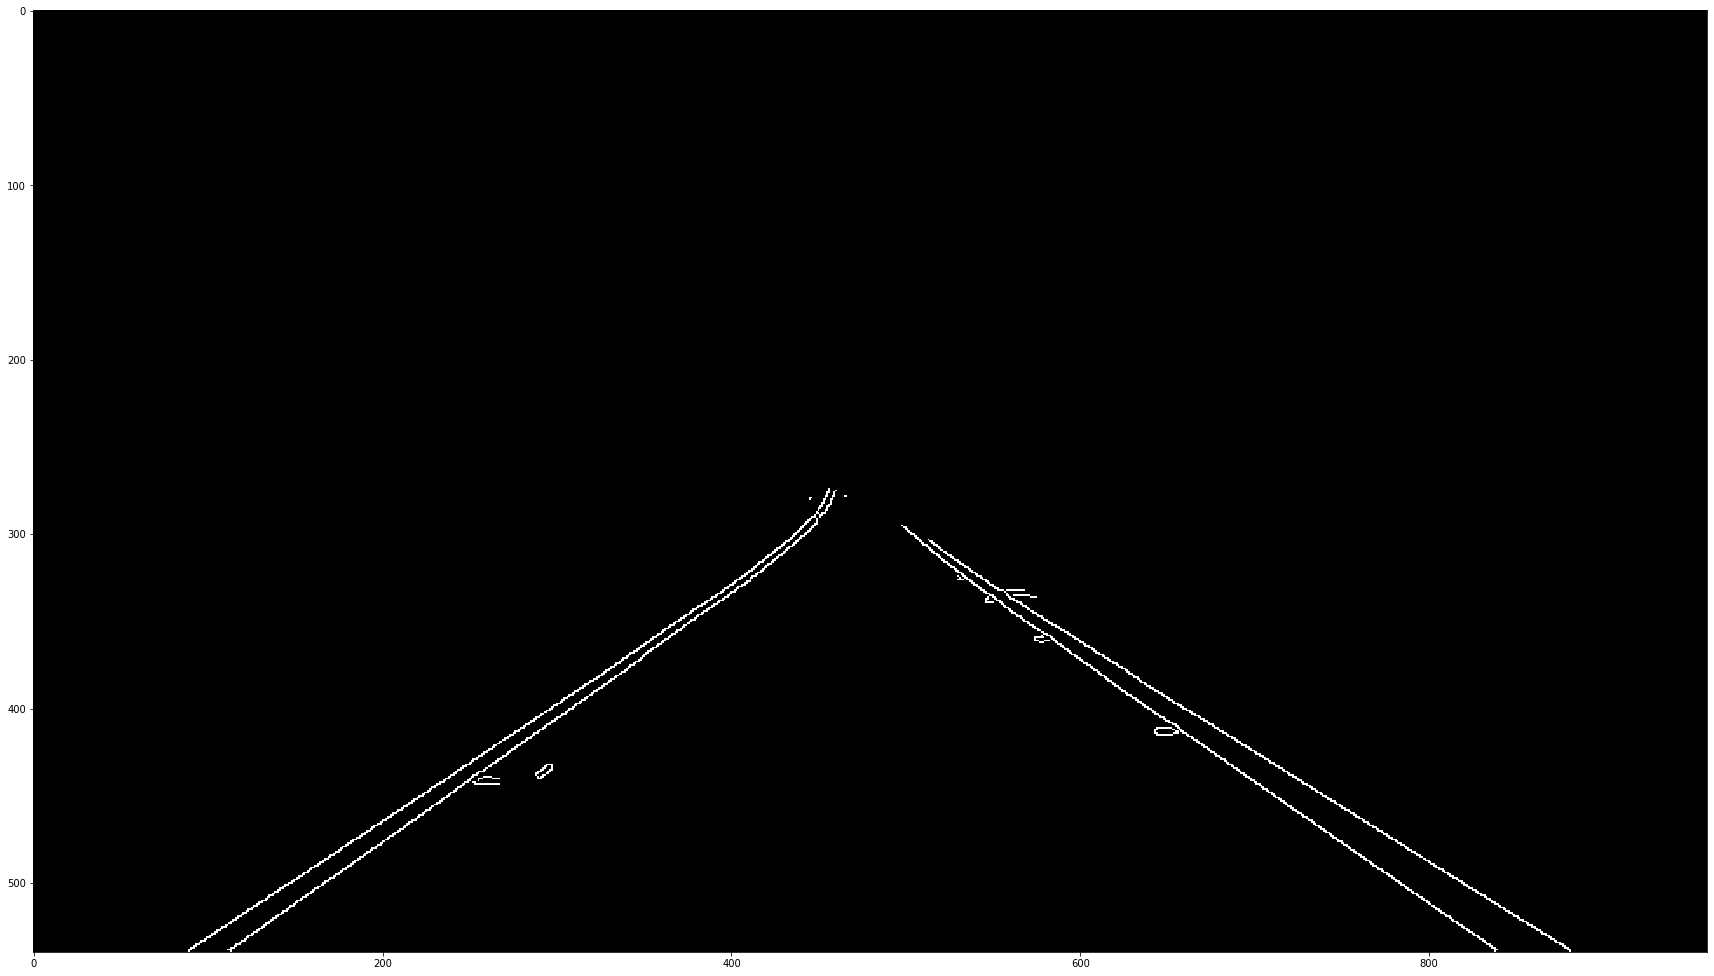

In [84]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(40,imshape[0]),(440, 290), (450, 270), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.figure(figsize = (30,20))

plt.imshow(masked_edges, cmap='Greys_r')

In [94]:
# Define the Hough transform parameters
# Make a blank image the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 1

line_image = np.copy(image)*0

In [95]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [96]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

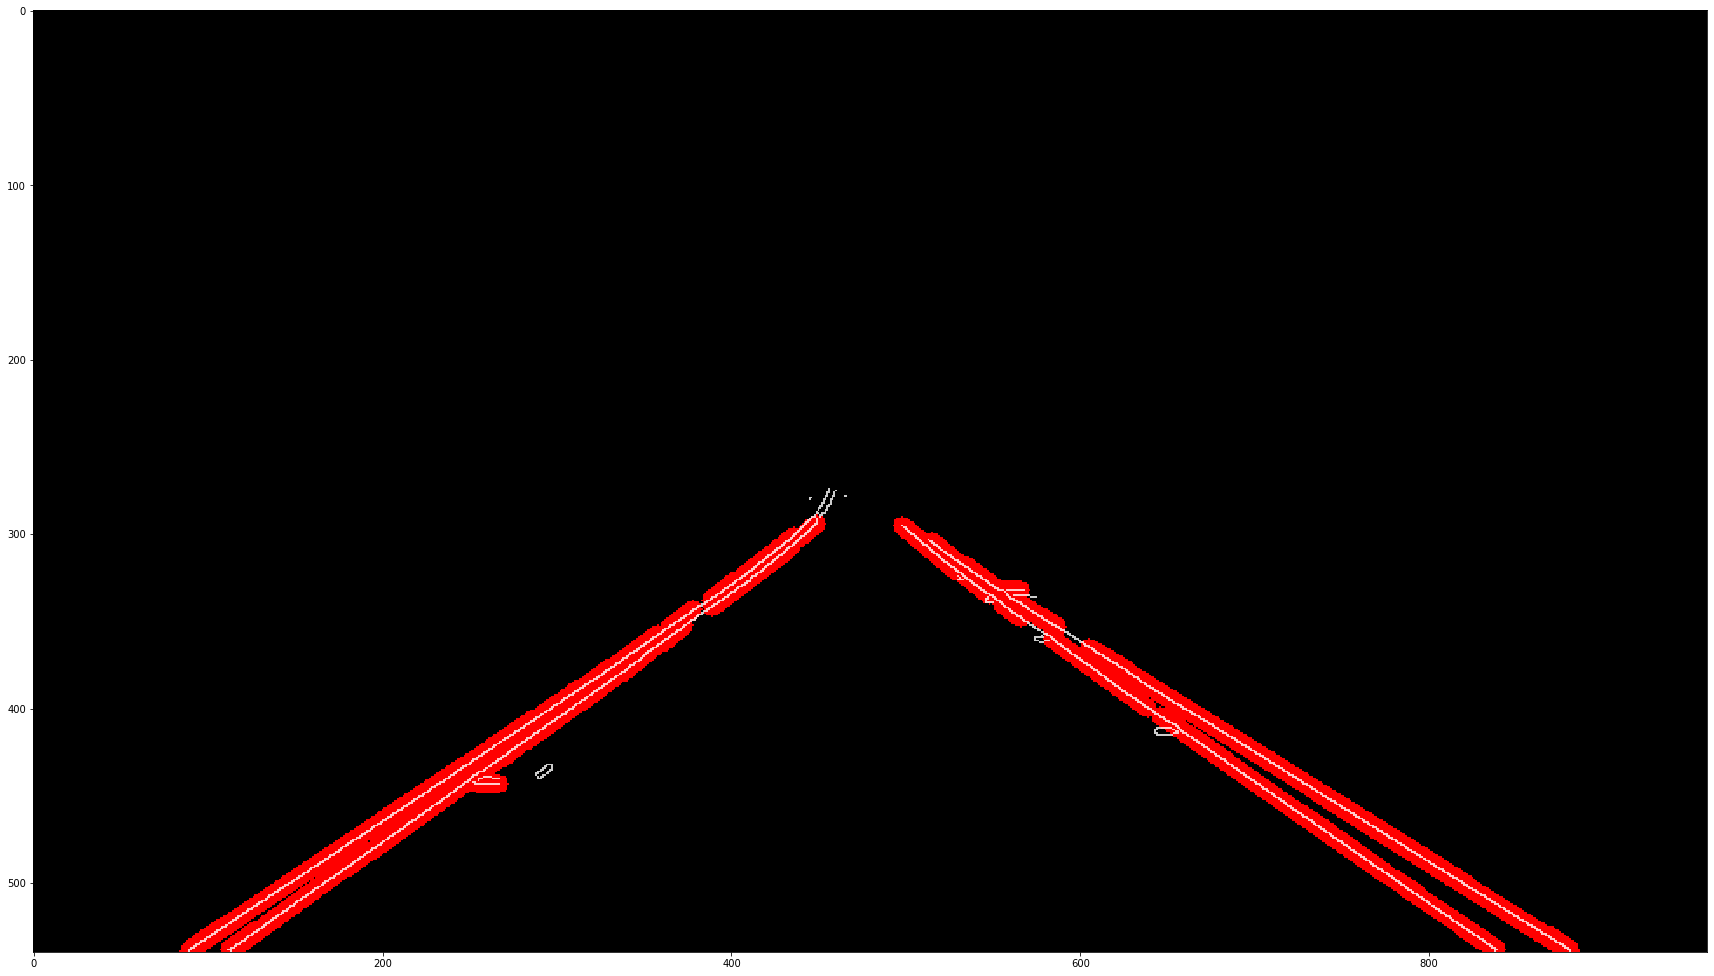

In [97]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))

# Draw the lines on the edge image
plt.figure(figsize = (30,20))
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)